<a href="https://colab.research.google.com/github/Saikumarerothu/CVIP-DataScience/blob/main/CVIP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Breast Cancer Prediction.
The objective of this project is to create a predictive model that can accurately classify breast
cancer cases as benign or malignant based on a set of relevant features. By leveraging
historical data and applying machine learning techniques, we aim to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer**



In [ ]:
import pandas as pd

# Load the dataset (replace 'breast_cancer_dataset.csv' with your dataset)
data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

# Inspect the data
print(data.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [ ]:
# Encode the 'diagnosis' column (M: malignant, B: benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target variable (y)
X = data.drop(['id', 'diagnosis'], axis=1)  # Features
y = data['diagnosis']  # Target variable



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)


In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC Score: 0.9952505732066819


In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to show feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


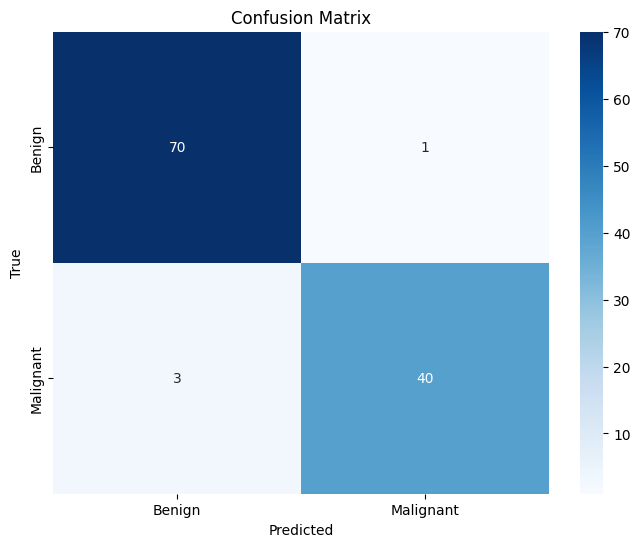

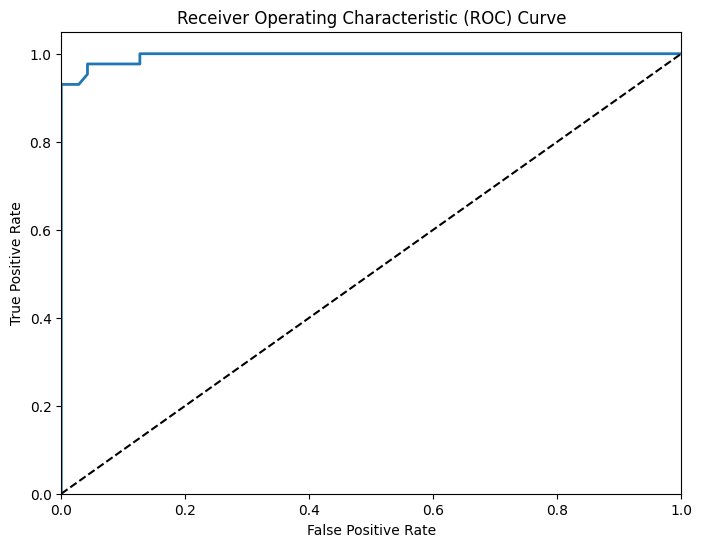

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
